In [1]:
import pandas as pd
import numpy as np
import missingno

In [2]:
df = pd.read_csv("../data/laptops.csv")

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Q1. Pandas version

What's the version of Pandas that you installed?

In [4]:
pd.__version__

'2.2.3'

## Q2. Records count

How many records are in the dataset?

In [5]:
len(df)

2160

## Q3. Laptop brands

How many laptop brands are presented in the dataset?

In [6]:
len(df['Brand'].unique())

27

## Q4. Missing values

How many columns in the dataset have missing values?

In [7]:
df[df['Screen'].isnull()==True]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
624,Acer Extensa 15 EX215-54 Intel Core i5-1135G7/...,New,Acer,Extensa,Intel Core i5,8,256,SSD,NaN,NaN,No,524.99
1430,HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel C...,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 560...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


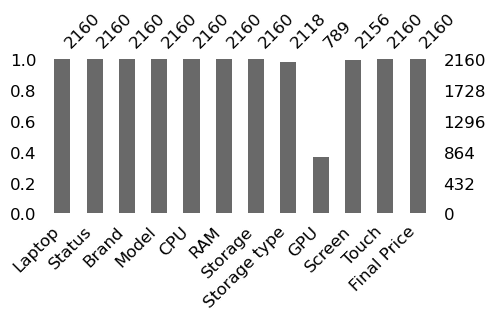

In [8]:
missingno.bar(df, figsize=(5,2), fontsize=12);

In [9]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Q5. Maximum final price

What's the maximum final price of Dell notebooks in the dataset?

In [10]:
subset = df.loc[df['Brand'] == 'Dell']

In [11]:
max_final_price = subset['Final Price'].max()
max_final_price 

np.float64(3936.0)

## Q6. Median value of Screen

    Find the median value of Screen column in the dataset.
    Next, calculate the most frequent value of the same Screen column.
    Use fillna method to fill the missing values in Screen column with the most frequent value from the previous step.
    Now, calculate the median value of Screen once again.

Has it changed?
#####    No

In [12]:
df['Screen'].median()

np.float64(15.6)

In [13]:
fill_in=df['Screen'].mode().values[0]

In [14]:
df['Screen'] = df['Screen'].fillna(value=fill_in)

In [15]:
df[df['Screen'].isnull()==True]


,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price


In [16]:
df['Screen'].median()

np.float64(15.6)

## Q7. Sum of weights

     - [x] Select all the "Innjoo" laptops from the dataset.
     - [x] Select only columns RAM, Storage, Screen.
     - [x] Get the underlying NumPy array. Let's call it X.
     - [x] get the transpose, use X.T
     - [x] Compute matrix-matrix multiplication between the transpose of X and X. Let's call the result XTX.
     - [x] Compute the inverse of XTX.
     - [x] Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
     - [x] Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
    
    What's the sum of all the elements of the result?

In [17]:
# - [x] Select all the "Innjoo" laptops from the dataset.
# - [x] Select only columns RAM, Storage, Screen.
# - [x] Get the underlying NumPy array. Let's call it X.

Innjoo = df[df['Brand']=="Innjoo"]
X = Innjoo.drop(['Laptop','Status','Brand','Model','CPU','Storage type','GPU','Touch','Final Price'], axis=1)
X = np.array(X)
X

array([[  8. , 256. ,  15.6],
       [  8. , 512. ,  15.6],
       [  4. ,  64. ,  14.1],
       [  6. ,  64. ,  14.1],
       [  6. , 128. ,  14.1],
       [  6. , 128. ,  14.1]])

In [18]:
# - [x] get the transpose, use X.T
# - [x] Compute matrix-matrix multiplication between the transpose of X and X. Let's call the result XTX.

XTX = np.dot(X.T, X)
XTX

array([[2.52000e+02, 8.32000e+03, 5.59800e+02],
       [8.32000e+03, 3.68640e+05, 1.73952e+04],
       [5.59800e+02, 1.73952e+04, 1.28196e+03]])

In [19]:
# - [x] Compute the inverse of XTX.

XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.78025381e-01, -1.51791334e-03, -1.00809855e-01],
       [-1.51791334e-03,  1.58286725e-05,  4.48052175e-04],
       [-1.00809855e-01,  4.48052175e-04,  3.87214888e-02]])

In [20]:
# - [x] Create an array y with values [1100, 1300, 800, 900, 1000, 1100].

y = np.array([1100, 1300, 800, 900, 1000, 1100])
y

array([1100, 1300,  800,  900, 1000, 1100])

In [21]:
w = np.dot(XTX_inv, X.T)
w

array([[ 0.26298349, -0.12560233, -0.40646389,  0.14958687,  0.05244042,
         0.05244042],
       [-0.00110155,  0.00295059,  0.00125892, -0.00177691, -0.00076387,
        -0.00076387],
       [-0.08772226,  0.0269791 ,  0.17140891, -0.0302108 , -0.00153546,
        -0.00153546]])

In [22]:
# - [x] Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.

w = np.dot(w, y)

In [23]:
sum(w)

np.float64(91.2998806299557)